In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
import os
import struct
import numpy as np




In [3]:
from __future__ import print_function
import argparse
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torch.autograd import Variable

In [4]:

def load_mnist(path, kind='train'):
    """Load MNIST data from `path`"""
    labels_path = os.path.join(path,
                               '%s-labels-idx1-ubyte'
                               % kind)
    images_path = os.path.join(path,
                               '%s-images-idx3-ubyte'
                               % kind)
    with open(labels_path, 'rb') as lbpath:
        magic, n = struct.unpack('>II',
                                 lbpath.read(8))
        labels = np.fromfile(lbpath,
                             dtype=np.uint8)

    with open(images_path, 'rb') as imgpath:
        magic, num, rows, cols = struct.unpack('>IIII',
                                               imgpath.read(16))
        images = np.fromfile(imgpath,
                             dtype=np.uint8).reshape((len(labels),28,28))

    return images, labels

In [5]:
X_train, y_train = load_mnist('./data')
                              
X_test, y_test = load_mnist('./data',kind='t10k')
print(X_test.shape,y_test.shape)

(10000, 28, 28) (10000,)


In [6]:
def img_show(img):
    plt.figure(figsize=(1,1))
    plt.imshow(img,cmap='Greys',interpolation='nearest')
    

In [7]:
def imgs_show(imgs,row,col):
    fig,ax = plt.subplots(nrows=row,ncols=col,sharex=True,sharey=True)
    ax = ax.flatten()
    for i in range(row*col):
        img = imgs[i]
        ax[i].imshow(img,cmap='Greys', interpolation='nearest')
    
    ax[0].set_xticks([])
    ax[0].set_yticks([])
    plt.tight_layout()
    plt.show()
    
    

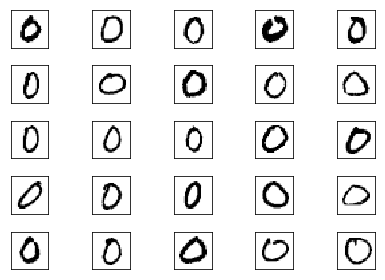

In [9]:
imgs_show(X_test[y_test == 0][:25],5,5)

In [11]:
def normal_minist(img):
    return (img / 255) -0.5

In [12]:
def expend_HWC(img):
    return np.expand_dims(img,axis=3)


In [13]:
def to_CHW(img):
    return np.transpose(img,(0,3,1,2))
def to_HWC(img):
    return np.transpose(img,(0,2,3,1))

In [14]:
#只能运行一次
X_train_nor = expend_HWC(X_train)
X_train_nor = normal_minist(X_train_nor)
X_train_nor = to_CHW(X_train_nor)
print(X_train_nor.shape)

X_test_nor = expend_HWC(X_test)
X_test_nor = normal_minist(X_test_nor)
X_test_nor = to_CHW(X_test_nor)
print(X_test_nor.shape)




(60000, 1, 28, 28)
(10000, 1, 28, 28)


In [15]:
eval_index = 0


In [16]:

test_postitive = X_test_nor[y_test == eval_index]
test_nagivate = X_test_nor[y_test != eval_index]
print(test_postitive.shape)
print(test_nagivate.shape)

#[[0,55,1111,1009,327,128,5000,469,2000,3001]]
train_positive = X_train_nor[y_train == eval_index]
# imgs_show(train_positive,2,5)
# train_nagivate = np.concatenate((train_1 , train_2 ,train_3 , train_4 ,train_5 ,
#                                  train_6 , train_7 ,train_8 ,train_9)) 
train_nagivate = X_train_nor[y_train != eval_index]


print(train_nagivate.shape)
print(train_positive.shape)

# imgs_show(train_nagivate[:25],5,5)



(980, 1, 28, 28)
(9020, 1, 28, 28)
(54077, 1, 28, 28)
(5923, 1, 28, 28)


In [29]:
train_pos = np.concatenate((train_positive,train_positive.copy(),train_positive.copy(),train_positive.copy(),train_positive.copy()
                              ,train_positive.copy(),train_positive.copy(),train_positive.copy(),train_positive.copy()))

print(train_pos.shape)

(53307, 1, 28, 28)


In [31]:


lable_pos = np.zeros(len(train_pos))
lable_na = np.ones(len(train_nagivate))

train_img = np.concatenate((train_pos,train_nagivate))
label_img = np.concatenate((lable_pos,lable_na))
print(train_img.shape)
print(label_img.shape)
shuf_index = np.random.permutation(len(train_img))
print(shuf_index)

train_img = train_img[shuf_index]
label_img = label_img[shuf_index]
print(train_img.shape)
print(label_img.shape)

(107384, 1, 28, 28)
(107384,)
[ 65739  97054 106281 ...  46654   9599  67577]
(107384, 1, 28, 28)
(107384,)


[1. 1. 1. 0. 0. 1. 1. 0. 1. 1.]


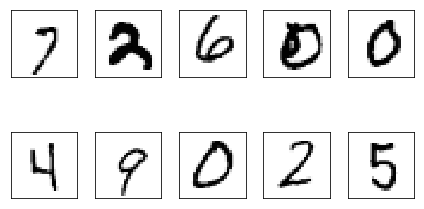

In [32]:
print(label_img[:10])
imgs_show(np.squeeze (train_img[:10]),2,5)


In [33]:
def num_flat_features(x):
    size = x.size()[1:]
    num_features =1
        
    for s in size:
        num_features *= s
    return num_features
        

In [34]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 10, kernel_size=5,stride=2)
        self.bn2 = nn.
#         self.conv2 = nn.Conv2d(10, 10, kernel_size=3,stride=2)
        self.conv3 = nn.Conv2d(10,20,kernel_size=5,stride=2)
#         self.conv4 = nn.Conv2d(20,20,kernel_size=3,stride=2)
        
        self.conv3_drop = nn.Dropout2d()
        self.fc1 = nn.Linear(320, 50)
        self.fc2 = nn.Linear(50, 10)
        self.features={}


    def forward(self, x):
        
        x = F.relu(self.conv1(x))
        self.features['relu1'] = x
#         x = F.leaky_relu(self.conv2(x))
#         self.features['relu2'] = x
        x = self.conv3(x)
        self.features['conv3'] = x
        x = F.relu( x)
        self.features['relu3'] = x
#         x = self.conv3_drop(x)
#         x = F.leaky_relu(self.conv4(x))
#         self.features['relu4'] = x
        
        x = x.view(-1, num_flat_features(x))
        self.features['flat'] = x
        x = F.relu(self.fc1(x))
        self.features['fc1'] = x
        x = F.dropout(x, training=self.training)
        x = self.fc2(x)
        self.features['fc2'] = x
        return F.log_softmax(x, dim=1)
    


In [35]:
def getnext(train_x,train_y,batch_size):
    batchs = len(train_y) // batch_size
    print(len(train_y),batchs)

    for i in range(batchs):
        x = train_x[batch_size * i : batch_size * (i+1)]
        y = train_y[batch_size * i : batch_size * (i+1)]
        yield x,y
        

In [36]:
def get_nagivate_next(train_positive,train_nagivate):
    batch_size = len(train_positive)
    batchs = len(train_nagivate) // batch_size
    print(len(train_nagivate),batchs)
    
    for i in range(batchs):
        x = np.concatenate((train_positive,train_nagivate[batch_size * i : batch_size * (i+1)]))
        y = np.concatenate((np.zeros(batch_size),np.ones(batch_size)))
        shuf_index = np.random.permutation(len(y))
        x = x[shuf_index]
        y = y[shuf_index]
        
        
        yield x ,y 
        

In [37]:
datas = getnext(train_img,label_img,1000)
for x,y in datas:
    print(x.shape)
    
    print(y.shape)
#     imgs_show(np.squeeze( x),4,5)


107384 107
(1000, 1, 28, 28)
(1000,)
(1000, 1, 28, 28)
(1000,)
(1000, 1, 28, 28)
(1000,)
(1000, 1, 28, 28)
(1000,)
(1000, 1, 28, 28)
(1000,)
(1000, 1, 28, 28)
(1000,)
(1000, 1, 28, 28)
(1000,)
(1000, 1, 28, 28)
(1000,)
(1000, 1, 28, 28)
(1000,)
(1000, 1, 28, 28)
(1000,)
(1000, 1, 28, 28)
(1000,)
(1000, 1, 28, 28)
(1000,)
(1000, 1, 28, 28)
(1000,)
(1000, 1, 28, 28)
(1000,)
(1000, 1, 28, 28)
(1000,)
(1000, 1, 28, 28)
(1000,)
(1000, 1, 28, 28)
(1000,)
(1000, 1, 28, 28)
(1000,)
(1000, 1, 28, 28)
(1000,)
(1000, 1, 28, 28)
(1000,)
(1000, 1, 28, 28)
(1000,)
(1000, 1, 28, 28)
(1000,)
(1000, 1, 28, 28)
(1000,)
(1000, 1, 28, 28)
(1000,)
(1000, 1, 28, 28)
(1000,)
(1000, 1, 28, 28)
(1000,)
(1000, 1, 28, 28)
(1000,)
(1000, 1, 28, 28)
(1000,)
(1000, 1, 28, 28)
(1000,)
(1000, 1, 28, 28)
(1000,)
(1000, 1, 28, 28)
(1000,)
(1000, 1, 28, 28)
(1000,)
(1000, 1, 28, 28)
(1000,)
(1000, 1, 28, 28)
(1000,)
(1000, 1, 28, 28)
(1000,)
(1000, 1, 28, 28)
(1000,)
(1000, 1, 28, 28)
(1000,)
(1000, 1, 28, 28)
(1000,)
(

In [38]:
use_cuda = torch.cuda.is_available()
torch.manual_seed(666)
device = torch.device("cuda" if use_cuda else "cpu")
net = Net().to(device)
net.double()

optimizer = optim.SGD(net.parameters(),lr=0.003,momentum=0.9,weight_decay=3e-4)


In [39]:
net.train()
for epoch in range(20):
    datas = getnext(train_img,label_img,64)
    trainloss = 0
    
    for x,y in datas:
        inputs, labels = Variable(torch.from_numpy(x)).to(device), Variable(torch.from_numpy(y).long()).to(device)
#         print(labels)
        optimizer.zero_grad()
        output = net(inputs)
#         print(output.size())
        loss = F.nll_loss(output,labels)
        trainloss += loss.item()
        loss.backward()
        optimizer.step()
        
    print('%d  loss: %.3f' % (epoch ,  trainloss))
torch.save(net,'model_class_two.pkl')

107384 1677
0  loss: 265.375
107384 1677
1  loss: 83.171
107384 1677
2  loss: 55.278
107384 1677
3  loss: 40.297
107384 1677
4  loss: 30.726
107384 1677
5  loss: 25.828
107384 1677
6  loss: 20.394
107384 1677
7  loss: 17.396
107384 1677
8  loss: 16.270
107384 1677
9  loss: 14.241
107384 1677
10  loss: 11.909
107384 1677
11  loss: 11.783
107384 1677
12  loss: 10.830
107384 1677
13  loss: 10.335
107384 1677
14  loss: 9.002
107384 1677
15  loss: 8.077
107384 1677
16  loss: 8.517
107384 1677
17  loss: 7.904
107384 1677
18  loss: 7.972
107384 1677
19  loss: 6.790


C:\Program Files\Anaconda3\lib\site-packages\torch\serialization.py:193: UserWarning: Couldn't retrieve source code for container of type Net. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "


In [44]:
net = torch.load('model_class_two.pkl')
net.to(device)
net.eval()
test_loss = 0
correct = 0
correct = 0
test_loss = 0

with torch.no_grad():
    test_datas = getnext(test_postitive,np.zeros(len(test_postitive)),4)
    for x ,y in test_datas:
        inputs, labels = Variable(torch.from_numpy(x)).to(device), Variable(torch.from_numpy(y).long()).to(device)
        output = net(inputs)
        test_loss += F.nll_loss(output, labels, size_average=False).item() # sum up batch loss
        pred = output.max(1,keepdim=True)[1]
#         print(pred)
        correct += pred.eq(labels.view_as(pred)).sum().item()
#         print(correct)

print('\nTest set: Average loss: {:.4f}, Accuracy: {} ({:.4f}%)\n'.format(
        test_loss, correct,100. * correct / len(test_postitive)))


correct = 0
test_loss = 0
with torch.no_grad():
    test_datas = getnext(test_nagivate,np.ones(len(test_nagivate)),32)
    for x ,y in test_datas:
        inputs, labels = Variable(torch.from_numpy(x)).to(device), Variable(torch.from_numpy(y).long()).to(device)
        output = net(inputs)
        test_loss += F.nll_loss(output, labels, size_average=False).item() # sum up batch loss
        pred = output.max(1,keepdim=True)[1]
#         print(pred)
        correct += pred.eq(labels.view_as(pred)).sum().item()
#         print(correct)

print('\nTest set: Average loss: {:.4f}, Accuracy: {} ({:.4f}%)\n'.format(
        test_loss, correct,100. * correct / len(test_nagivate)))
        
        
        

980 245

Test set: Average loss: 26.6785, Accuracy: 974 (99.3878%)

9020 281

Test set: Average loss: 46.7831, Accuracy: 8977 (99.5233%)



(1, 1, 28, 28)
tensor([[ 0]])
(20, 4, 4)
torch.Size([10, 1, 5, 5])


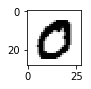

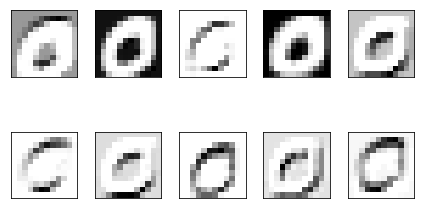

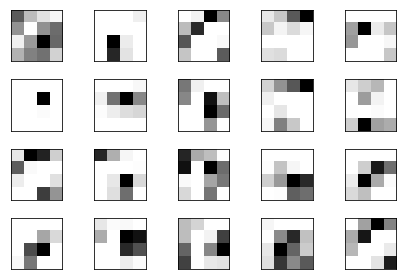

In [45]:
net.eval()
with torch.no_grad():
    x = train_positive[4:5]
    print(x.shape)
    inputs = Variable(torch.from_numpy(x)).to(device)
    output = net(inputs)
    pred = output.max(1,keepdim=True)[1]
    print(pred)
    imgs_relu1 = np.squeeze(net.features['relu1'].cpu().numpy())
    imgs_relu3 = np.squeeze(net.features['relu3'].cpu().numpy())
#     print(x.shape)
    
    print(imgs_relu3.shape)
#     print(net.features['relu2'].size())
#     print(net.features['relu3'].size())
#     print(net.features['relu4'].size())
#     print(net.features['flat'].size())
#     print(imgs_relu1[9])
    print(net.conv1.weight.size())
    img_show(np.squeeze(x))
    imgs_show( imgs_relu1,2,5)
    imgs_show( imgs_relu3,4,5)
#     imgs_show(np.squeeze(net.conv1.weight),2,5)
#     imgs_show(np.squeeze(net.conv2.weight),2,5)
    

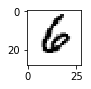

In [101]:
img_show(np.squeeze(train_nagivate[12]))

(1, 1, 28, 28)
tensor([[ 1]])
(20, 4, 4)
torch.Size([10, 1, 5, 5])


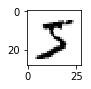

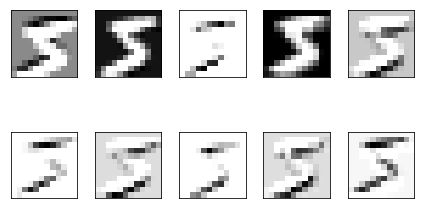

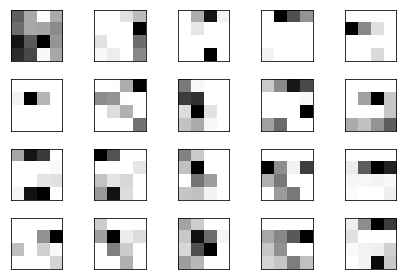

In [46]:
net.eval()
with torch.no_grad():
    x = train_nagivate[0:1]
    print(x.shape)
    inputs = Variable(torch.from_numpy(x)).to(device)
    output = net(inputs)
    pred = output.max(1,keepdim=True)[1]
    print(pred)
    imgs_relu1 = np.squeeze(net.features['relu1'].cpu().numpy())
    imgs_relu3 = np.squeeze(net.features['relu3'].cpu().numpy())
#     print(x.shape)
    
    print(imgs_relu3.shape)
#     print(net.features['relu2'].size())
#     print(net.features['relu3'].size())
#     print(net.features['relu4'].size())
#     print(net.features['flat'].size())
#     print(imgs_relu1[9])
    print(net.conv1.weight.size())
    img_show(np.squeeze(x))
    imgs_show( imgs_relu1,2,5)
    imgs_show( imgs_relu3,4,5)